<a href="https://colab.research.google.com/github/lofel888/ML_code_projects/blob/main/Praktika_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hb20007/gender-classification")

print("Path to dataset files:", path)

100%|██████████| 666/666 [00:00<00:00, 513kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hb20007/gender-classification/versions/1


In [ ]:
import pandas as pd
import os

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

csv_path = os.path.join(path, csv_files[0])
df = pd.read_csv(csv_path)

Задание 2

In [ ]:
print("Shape:", df.shape)

Shape: (66, 5)


In [ ]:
print("\nHead:")
print(df.head())


Head:
  Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink  \
0           Cool                 Rock             Vodka          7UP/Sprite   
1        Neutral              Hip hop             Vodka     Coca Cola/Pepsi   
2           Warm                 Rock              Wine     Coca Cola/Pepsi   
3           Warm     Folk/Traditional           Whiskey               Fanta   
4           Cool                 Rock             Vodka     Coca Cola/Pepsi   

  Gender  
0      F  
1      F  
2      F  
3      F  
4      F  


In [ ]:
print("\nDescribe:")
print(df.describe(include='all'))


Describe:
       Favorite Color Favorite Music Genre Favorite Beverage  \
count              66                   66                66   
unique              3                    7                 6   
top              Cool                 Rock     Doesn't drink   
freq               37                   19                14   

       Favorite Soft Drink Gender  
count                   66     66  
unique                   4      2  
top        Coca Cola/Pepsi      F  
freq                    32     33  


In [ ]:
print("\nInfo:")
print(df.info)


Info:
<bound method DataFrame.info of    Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink  \
0            Cool                 Rock             Vodka          7UP/Sprite   
1         Neutral              Hip hop             Vodka     Coca Cola/Pepsi   
2            Warm                 Rock              Wine     Coca Cola/Pepsi   
3            Warm     Folk/Traditional           Whiskey               Fanta   
4            Cool                 Rock             Vodka     Coca Cola/Pepsi   
..            ...                  ...               ...                 ...   
61           Cool                 Rock             Vodka     Coca Cola/Pepsi   
62           Cool              Hip hop              Beer     Coca Cola/Pepsi   
63        Neutral              Hip hop     Doesn't drink               Fanta   
64           Cool                 Rock              Wine     Coca Cola/Pepsi   
65           Cool           Electronic              Beer     Coca Cola/Pepsi   



In [ ]:
print("\nПропущенных значений в колнках:")
print(df.isnull().sum())


Пропущенных значений в колнках:
Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64


Задание 3

Пропущенных значений в датасете нет. Всего 66 строк и 5 столбцов. Столбцы: "Favorite Color", "Favorite Music Genre", "Favorite Beverage", "Favorite Soft Drink", "Gender".

Задание 4

Нет необходимости  в скалярной стандартизации данных, используя, например,
StandardScaler (класс из библиотеки scikit-learn), так как все значения в столбцах имеют нечисловые значения.

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df['Gender'])
print("Метки:", le.classes_)
df_encoded['Favorite Color'] = le.fit_transform(df['Favorite Color'])
print("Метки:", le.classes_)
df_encoded['Favorite Music Genre'] = le.fit_transform(df['Favorite Music Genre'])
print("Метки:", le.classes_)
df_encoded['Favorite Beverage'] = le.fit_transform(df['Favorite Beverage'])
print("Метки:", le.classes_)
df_encoded['Favorite Soft Drink'] = le.fit_transform(df['Favorite Soft Drink'])
print("Метки:", le.classes_)
print(df_encoded.head())

Метки: ['F' 'M']
Метки: ['Cool' 'Neutral' 'Warm']
Метки: ['Electronic' 'Folk/Traditional' 'Hip hop' 'Jazz/Blues' 'Pop'
 'R&B and soul' 'Rock']
Метки: ['Beer' "Doesn't drink" 'Other' 'Vodka' 'Whiskey' 'Wine']
Метки: ['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']
   Favorite Color  Favorite Music Genre  Favorite Beverage  \
0               0                     6                  3   
1               1                     2                  3   
2               2                     6                  5   
3               2                     1                  4   
4               0                     6                  3   

   Favorite Soft Drink  Gender  
0                    0       0  
1                    1       0  
2                    1       0  
3                    2       0  
4                    1       0  


In [ ]:
from sklearn.model_selection import train_test_split
y = df_encoded["Gender"]
X = df_encoded.drop('Gender', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

Задание 5

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(random_state=42, max_iter=200)
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(random_state=42, n_estimators=100)
model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Задание 6

In [ ]:
# Предсказания
y_pred_lr = model_1.predict(X_test)
y_pred_rf = model_2.predict(X_test)

In [ ]:
# Метрики
from sklearn.metrics import classification_report
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.54      0.88      0.67         8

    accuracy                           0.59        17
   macro avg       0.64      0.60      0.56        17
weighted avg       0.65      0.59      0.56        17

Random Forest:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.83      0.62      0.71         8

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17



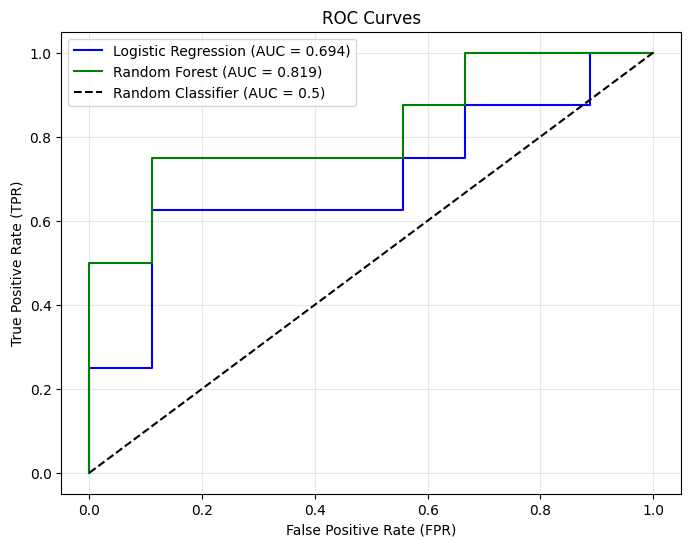

AUC Logistic Regression: 0.694
AUC Random Forest:       0.819


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Получаем вероятности положительного класса (второй столбец)
y_proba_lr = model_1.predict_proba(X_test)[:, 1]  # для логистической регрессии
y_proba_rf = model_2.predict_proba(X_test)[:, 1]        # для Random Forest

# Вычисляем ROC-кривые и AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Вывод AUC
print(f"AUC Logistic Regression: {auc_lr:.3f}")
print(f"AUC Random Forest:       {auc_rf:.3f}")

Задание 7

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold

# Настройка кросс-валидации
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results_lr = cross_validate(model_1, X_train, y_train, cv=cv, scoring=scoring)
cv_results_rf = cross_validate(model_2, X_train, y_train, cv=cv, scoring=scoring)

# Вывод усреднённых метрик
def print_cv_summary(name, results):
    print(f"\n {name} — Кросс-валидация (5-Fold, на X_train):")
    for key in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
        mean = np.mean(results[key])
        std = np.std(results[key])
        metric_name = key.replace('test_', '').replace('_', ' ').title()
        print(f"  {metric_name:12} = {mean:.4f} ± {std:.4f}")

print_cv_summary("Logistic Regression", cv_results_lr)
print_cv_summary("Random Forest", cv_results_rf)


 Logistic Regression — Кросс-валидация (5-Fold, на X_train):
  Accuracy     = 0.5711 ± 0.1468
  Precision    = 0.5867 ± 0.1749
  Recall       = 0.5200 ± 0.2040
  F1           = 0.5432 ± 0.1773
  Roc Auc      = 0.5540 ± 0.2462

 Random Forest — Кросс-валидация (5-Fold, на X_train):
  Accuracy     = 0.4511 ± 0.2454
  Precision    = 0.4317 ± 0.2409
  Recall       = 0.4800 ± 0.3487
  F1           = 0.4438 ± 0.2790
  Roc Auc      = 0.4720 ± 0.2881
